In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import CSV Data as panda data frame

In [77]:
df = pd.read_csv('C:/Users/Alicia/Desktop/Self_Development/Python/ML_Projects/MetalManufacturing/src/notebook/data/MetalCoy_Dataset.csv')

In [78]:
df

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die
...,...,...,...,...,...,...,...,...,...,...,...
995,462.984817,Blade,equiGrain,24,2.023624,2.741713,20,0,0,Bottom,Continuous
996,1426.298870,Nozzle,equiGrain,21,1.741670,7.206022,12,0,0,Bottom,Investment
997,1538.072772,Blade,colGrain,14,1.658847,8.276388,12,0,0,Top,Investment
998,1893.052813,Nozzle,equiGrain,9,2.124314,5.033330,0,0,0,Bottom,Continuous


### Show to 5 records of the dataset

In [79]:
df.head()

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die


### Show the shape of the dataset

In [80]:
df.shape

(1000, 11)

### Dataset information

##### Lifespan : The expected life span of the metal part
##### Part Type : Category of metal part types -> ('Blade', 'Nozzle', 'Block', 'Valve')    
##### microstructure : Structure types of the metal part -> ('colGrain', 'singleGrain', 'equiGrain')    
##### coolingRate : The rate the part cools when hot    
##### quenchTime : The time it take to soap in liquid and get cold when hot
##### smalldefects : Amount of small defects
##### largedefects : Amount of large defects
##### silverDefects : Amount of silver defects
##### seedLocation : Location of seed on metal part -> ('Top', 'Bottom')
##### castType : Use category of  metal part -> ('Investment', 'Die', 'Continuous')

In [81]:
df['castType'].unique()

array(['Investment', 'Die', 'Continuous'], dtype=object)

### Data check to perform
##### *  Check missing value
##### * Check duplicate
##### * Check data type
##### * Check the number of unique values of each column
##### * Check statistics of dataset
##### * Check duplicate
##### * Check various categories present in the different categorical feature



### Checking missing values

In [82]:
df.isna().sum()

Lifespan          0
partType          0
microstructure    0
coolingRate       0
quenchTime        0
forgeTime         0
smallDefects      0
largeDefects      0
sliverDefects     0
seedLocation      0
castType          0
dtype: int64

#### There are no missing value in the dataset


### Checking duplicate

In [83]:
df.duplicated().sum()

0

#### There are no duplicate in the dataset

### Checking data types

In [84]:
# check null and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   smallDefects    1000 non-null   int64  
 7   largeDefects    1000 non-null   int64  
 8   sliverDefects   1000 non-null   int64  
 9   seedLocation    1000 non-null   object 
 10  castType        1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


### Check number of unique values in each column

In [85]:
df.nunique()

Lifespan          1000
partType             4
microstructure       3
coolingRate         26
quenchTime        1000
forgeTime         1000
smallDefects        31
largeDefects         5
sliverDefects       11
seedLocation         2
castType             3
dtype: int64

### Check dataset statistics

In [26]:
df.describe()

,Lifespan,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1366.373468,17.480000,2.786059,5.497136,13.37100,0.117000,0.286000
std,519.026551,7.557958,1.320935,2.613501,8.07047,0.565359,1.351307
min,115.120563,5.000000,0.501046,1.017799,0.00000,0.000000,0.000000
25%,960.976320,11.000000,1.608916,3.203739,8.00000,0.000000,0.000000
50%,1470.377014,17.000000,2.824488,5.510765,16.00000,0.000000,0.000000
75%,1757.165684,24.000000,3.902389,7.735951,20.00000,0.000000,0.000000
max,2380.142759,30.000000,4.990795,9.988511,33.00000,4.000000,10.000000


### Exploring the dataset

In [86]:
#create a list of categorical and non categorical features
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
for i in categorical_feature :
  #print out the unique values in each categorical columns  
  print("{col} has {vals} unique data values".format(col=i, vals= df[i].unique()))

print("\n")

print("There is {} numerical features: {}".format(len(numerical_feature),numerical_feature))
print("\nThere is {} categorical features: {}".format(len(categorical_feature),categorical_feature))

partType has ['Blade' 'Nozzle' 'Block' 'Valve'] unique data values
microstructure has ['colGrain' 'singleGrain' 'equiGrain'] unique data values
seedLocation has ['Top' 'Bottom'] unique data values
castType has ['Investment' 'Die' 'Continuous'] unique data values


There is 7 numerical features: ['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime', 'smallDefects', 'largeDefects', 'sliverDefects']

There is 4 categorical features: ['partType', 'microstructure', 'seedLocation', 'castType']


In [51]:
df.head()

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die


In [87]:
#Lable the categorical features with a new feature
df.loc[df['partType'] == "Blade" , "partType_new"] = 1
df.loc[df['partType'] == "Nozzle" , "partType_new"] = 2
df.loc[df['partType'] == "Block" , "partType_new"] = 3
df.loc[df['partType'] == "Valve" , "partType_new"] = 4

df.loc[df['microstructure'] == "colGrain" , "microstructure_new"] = 1
df.loc[df['microstructure'] == "singleGrain" , "microstructure_new"] = 2
df.loc[df['microstructure'] == "equiGrain" , "microstructure_new"] = 3

df.loc[df['seedLocation'] == "Top" , "seedLocation_new"] = 1
df.loc[df['seedLocation'] == "Bottom" , "seedLocation_new"] = 2

df.loc[df['castType'] == "Investment" , "castType_new"] = 1
df.loc[df['castType'] == "Die" , "castType_new"] = 2
df.loc[df['castType'] == "Continuous" , "castType_new"] = 3

In [66]:
categorical_feature

['partType', 'microstructure', 'seedLocation', 'castType']

In [89]:
df[categorical_feature]

,partType,microstructure,seedLocation,castType
0,Blade,colGrain,Top,Investment
1,Blade,singleGrain,Bottom,Die
2,Nozzle,colGrain,Bottom,Investment
3,Blade,colGrain,Bottom,Continuous
4,Nozzle,colGrain,Top,Die
...,...,...,...,...
995,Blade,equiGrain,Bottom,Continuous
996,Nozzle,equiGrain,Bottom,Investment
997,Blade,colGrain,Top,Investment
998,Nozzle,equiGrain,Bottom,Continuous


In [90]:
# drop the categorical feature
df.drop(categorical_feature, axis=1, inplace=True)

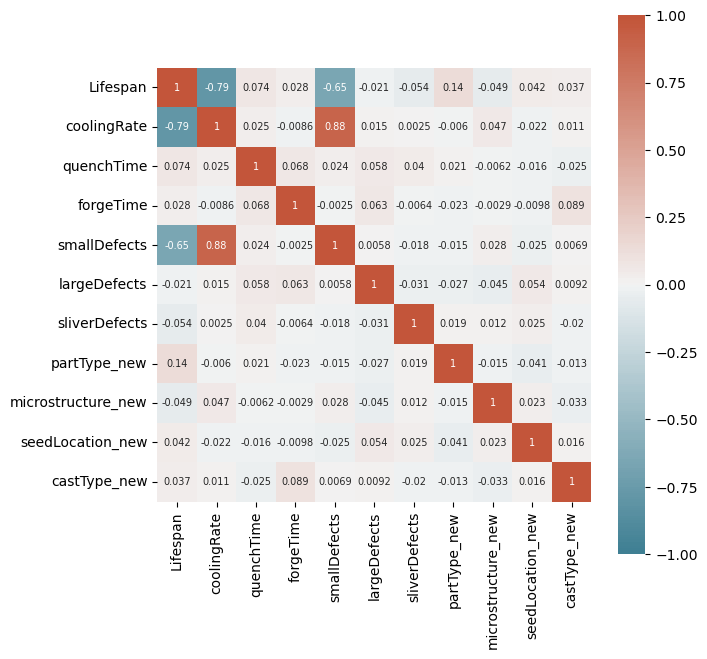

In [92]:
plt.figure(figsize=(7,7))
corr = df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 7})
plt.show()

### Findings
#### The following relationship are observed in the dataset between;
#### 1 "Lifespan" and "Cooling rate"
#### 2 "Small defects" and "Lifespan"
#### 3 "Small defects" and "Cooling rate"

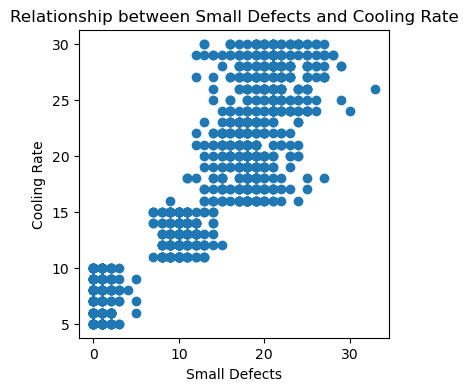

In [95]:
# the plot below show a slight upward of BMI as the age increases
plt.figure(figsize=(4, 4))
plt.scatter(df.smallDefects,df.coolingRate)
plt.xlabel('Small Defects')
plt.ylabel('Cooling Rate')
plt.title('Relationship between Small Defects and Cooling Rate')
plt.show()

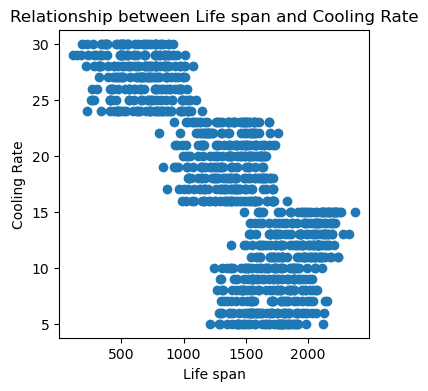

In [96]:
# the plot below show a slight upward of BMI as the age increases
plt.figure(figsize=(4, 4))
plt.scatter(df.Lifespan,df.coolingRate)
plt.xlabel('Life span')
plt.ylabel('Cooling Rate')
plt.title('Relationship between Life span and Cooling Rate')
plt.show()

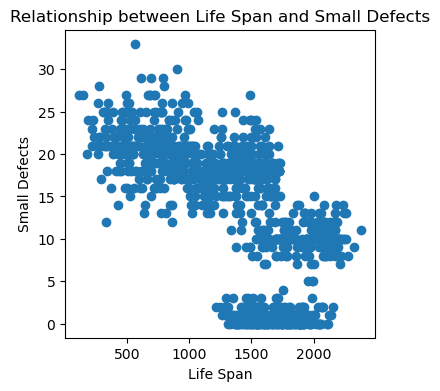

In [97]:
# the plot below show a slight upward of BMI as the age increases
plt.figure(figsize=(4, 4))
plt.scatter(df.Lifespan,df.smallDefects)
plt.xlabel('Life Span')
plt.ylabel('Small Defects')
plt.title('Relationship between Life Span and Small Defects')
plt.show()